In [9]:
import pandas as pd

# Input and output file paths
input_file = r"D:\New folder (5)\Household Electric Power Consumption\household_power_consumption.txt"  # Replace with your actual file
output_file = "power_consumption.csv"

# Read the semicolon-separated file
df = pd.read_csv(input_file, sep=";", engine="python")

# Save it as a CSV file (comma-separated)
df.to_csv(output_file, index=False)

print("✅ Conversion completed! CSV file saved as:", output_file)


✅ Conversion completed! CSV file saved as: power_consumption.csv


In [10]:
power=pd.read_csv(r'D:\New folder (5)\Household Electric Power Consumption\power_consumption.csv')
power.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_26200\1299806323.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  power=pd.read_csv(r'D:\New folder (5)\Household Electric Power Consumption\power_consumption.csv')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [11]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [12]:
print(power.isnull().sum())  # Count missing values per column


Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [14]:

print(power.duplicated().sum())  # Count duplicate rows



0


In [15]:
# Identify numeric columns
numeric_cols = ["Global_active_power", "Global_reactive_power", "Voltage", 
                "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

# Convert object columns to float (force conversion, replacing errors with NaN)
power[numeric_cols] = power[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Check for successful conversion
print(power.dtypes)
print(power.head())

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0 

In [16]:
# Convert 'Date' and 'Time' to a single datetime column
power["Datetime"] = pd.to_datetime(power["Date"] + " " + power["Time"], format="%d/%m/%Y %H:%M:%S")

# Drop original Date & Time columns
power.drop(columns=["Date", "Time"], inplace=True)

print(power.dtypes)

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object


In [17]:
power.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [31]:
numeric_cols = ["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
power[numeric_cols] = power[numeric_cols].apply(pd.to_numeric, errors="coerce")


In [32]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [39]:
nan1=power['Sub_metering_1'].isna().sum()
nan2=power['Sub_metering_2'].isna().sum()
nan3=power['Sub_metering_2'].isna().sum()


print(nan1)
print(nan2)
print(nan3)

25979
25979
25979


In [40]:
print(power['Sub_metering_1'].isna().sum())

25979


In [41]:
print(power['Sub_metering_2'].isna().sum())

25979


In [42]:
print(power['Sub_metering_3'].isna().sum())

25979


In [44]:
print(power['Global_reactive_power'].isna().sum())

25979


In [45]:
print(power['Voltage'].isna().sum())

25979


In [46]:
question_mark_counts = (power == "?").sum()
print("📌 Columns containing '?':\n", question_mark_counts[question_mark_counts > 0], "\n")

📌 Columns containing '?':
 Series([], dtype: int64) 



In [47]:
import numpy as np
power.replace("?", np.nan, inplace=True)

In [48]:
missing_values = power.isna().sum()
print("📌 Missing Values After Fix:\n", missing_values[missing_values > 0], "\n")


📌 Missing Values After Fix:
 Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64 



In [49]:
import pandas as pd
import numpy as np

# Assuming '?' has been replaced with NaN, convert columns to float
numeric_cols = ["Global_active_power", "Global_reactive_power", "Voltage",
                "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

power[numeric_cols] = power[numeric_cols].astype(float)

# Calculate mean, median, and mode
stats = {}
for col in numeric_cols:
    mean_val = power[col].mean()
    median_val = power[col].median()
    mode_val = power[col].mode()

    # Exclude 0 from mode if needed
    mode_val = mode_val[mode_val != 0].values  # Remove zero modes
    
    stats[col] = {
        "Mean": mean_val,
        "Median": median_val,
        "Mode": mode_val[0] if len(mode_val) > 0 else "No mode found"
    }

# Print results
for col, values in stats.items():
    print(f"📊 Statistics for {col}:")
    print(f"   Mean: {values['Mean']:.4f}")
    print(f"   Median: {values['Median']:.4f}")
    print(f"   Mode: {values['Mode']}")
    print("-" * 40)


📊 Statistics for Global_active_power:
   Mean: 1.0916
   Median: 0.6020
   Mode: 0.218
----------------------------------------
📊 Statistics for Global_reactive_power:
   Mean: 0.1237
   Median: 0.1000
   Mode: No mode found
----------------------------------------
📊 Statistics for Voltage:
   Mean: 240.8399
   Median: 241.0100
   Mode: 241.18
----------------------------------------
📊 Statistics for Global_intensity:
   Mean: 4.6278
   Median: 2.6000
   Mode: 1.0
----------------------------------------
📊 Statistics for Sub_metering_1:
   Mean: 1.1219
   Median: 0.0000
   Mode: No mode found
----------------------------------------
📊 Statistics for Sub_metering_2:
   Mean: 1.2985
   Median: 0.0000
   Mode: No mode found
----------------------------------------
📊 Statistics for Sub_metering_3:
   Mean: 6.4584
   Median: 1.0000
   Mode: No mode found
----------------------------------------


In [50]:
# Replace NaN values with the mean of the respective column
power.fillna(power.mean(), inplace=True)

# Verify if NaN values are replaced
print(power.isna().sum())  # Should print all zeros


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64


In [51]:

power[numeric_cols] = power[numeric_cols].astype(float)

# Replace NaN with mean for each column
power.fillna(power.mean(), inplace=True)

# Check if missing values are replaced
print("Missing values after replacement:\n", power.isna().sum())


Missing values after replacement:
 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64


In [56]:
power.to_csv("cleaned_data.csv", index=False, float_format="%.3f")

print("✅ CSV file saved successfully as 'cleaned_data.csv'!")


✅ CSV file saved successfully as 'cleaned_data.csv'!


In [14]:
p1=pd.read_csv(r'cleaned_data1.csv')
p1.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [58]:
# Count total NaN values in each column
null_counts = p1.isnull().sum()

# Print the result
print("📊 Total Null Values in Each Column:\n", null_counts)

# Sum of all NaN values in the dataset
total_nulls = null_counts.sum()
print("\n🔢 Total Null Values in Dataset:", total_nulls)


📊 Total Null Values in Each Column:
 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

🔢 Total Null Values in Dataset: 0


In [59]:
import pandas as pd

# Function to detect outliers using IQR
def detect_outliers_iqr(p1, columns):
    outlier_counts = {}
    
    for col in columns:
        Q1 = p1[col].quantile(0.25)  # 25th percentile
        Q3 = p1[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outlier_counts[col] = ((p1[col] < lower_bound) | (p1[col] > upper_bound)).sum()

    return outlier_counts

# List of numerical columns to check for outliers
numeric_cols = ["Global_active_power", "Global_reactive_power", "Voltage", 
                "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

# Detect outliers
outliers = detect_outliers_iqr(p1, numeric_cols)
print("📊 Outlier Counts (IQR Method):")
print(outliers)


📊 Outlier Counts (IQR Method):
{'Global_active_power': np.int64(96740), 'Global_reactive_power': np.int64(42234), 'Voltage': np.int64(54737), 'Global_intensity': np.int64(100959), 'Sub_metering_1': np.int64(195082), 'Sub_metering_2': np.int64(77149), 'Sub_metering_3': np.int64(0)}


In [60]:
from scipy import stats
import numpy as np

# Function to detect outliers using Z-score
def detect_outliers_zscore(p1, columns, threshold=3):
    outlier_counts = {}
    
    for col in columns:
        z_scores = np.abs(stats.zscore(p1[col]))  # Compute Z-score
        outlier_counts[col] = (z_scores > threshold).sum()  # Count outliers

    return outlier_counts

# Detect outliers using Z-score
outliers_zscore = detect_outliers_zscore(p1, numeric_cols)
print("📊 Outlier Counts (Z-Score Method):")
print(outliers_zscore)


📊 Outlier Counts (Z-Score Method):
{'Global_active_power': np.int64(36875), 'Global_reactive_power': np.int64(25003), 'Voltage': np.int64(13385), 'Global_intensity': np.int64(37432), 'Sub_metering_1': np.int64(56095), 'Sub_metering_2': np.int64(50991), 'Sub_metering_3': np.int64(0)}


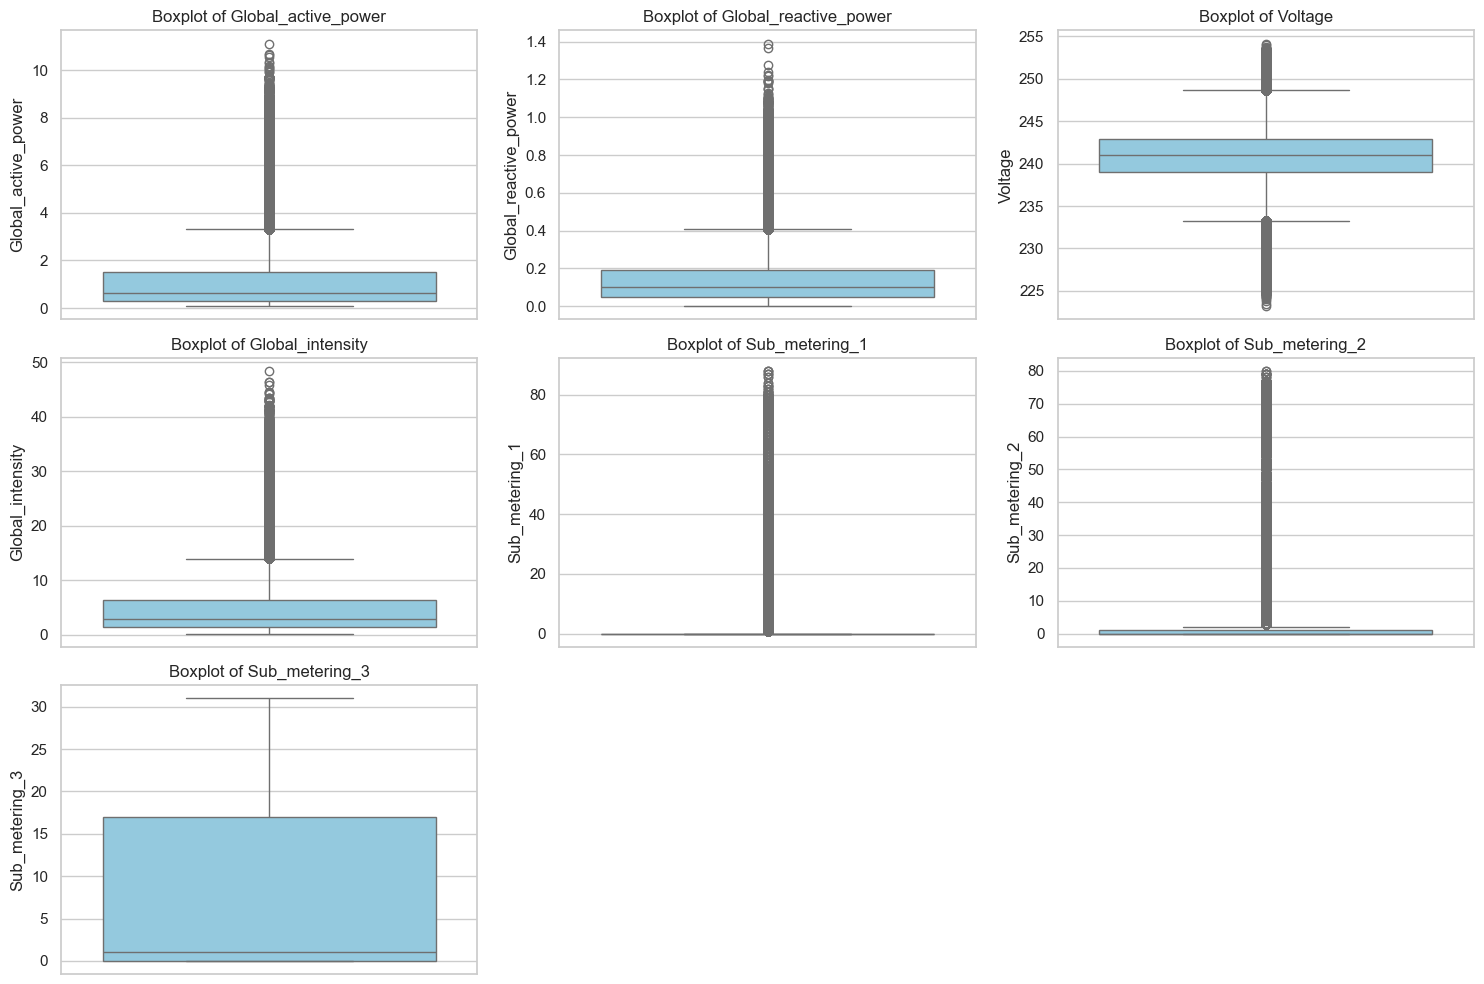

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

# List of numerical columns
numeric_cols = ["Global_active_power", "Global_reactive_power", "Voltage", 
                "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

# Create boxplots for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # Create a subplot for each column
    sns.boxplot(y=p1[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()  # Adjust layout for better visibility
plt.show()


In [76]:

# Function to compute median ignoring 0s and NaNs
def custom_median(series):
    filtered_series = series[(series != 0) & (~series.isna())]  # Exclude 0 and NaN
    return filtered_series.median() if not filtered_series.empty else np.nan  # Return NaN if no valid data

# Apply function to all numeric columns
median_values = p1.select_dtypes(include=[np.number]).apply(custom_median)

# Display median values
print(median_values)


Global_active_power        0.630
Global_reactive_power      0.124
Voltage                  240.960
Global_intensity           2.800
Sub_metering_1             1.122
Sub_metering_2             1.000
Sub_metering_3            17.000
dtype: float64


In [79]:


# Given median values
median_values = {
    "Global_active_power": 0.630,
    "Global_reactive_power": 0.124,
    "Voltage": 240.960,
    "Global_intensity": 2.800,
    "Sub_metering_1": 1.122,
    "Sub_metering_2": 1.000,
    "Sub_metering_3": 17.000
}

# Function to detect and replace outliers using IQR method
def replace_outliers_with_median(p1, median_values):
    for col in median_values.keys():
        if col in df.columns:
            Q1 = p1[col].quantile(0.25)
            Q3 = p1[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define outlier thresholds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Replace outliers with median
            df[col] = np.where((p1[col] < lower_bound) | (p1[col] > upper_bound), 
                               median_values[col], 
                               p1[col])
    return p1

# Apply function
p1 = replace_outliers_with_median(p1, median_values)

# Save cleaned data
p1.to_csv("cleaned_data1.csv", index=False,float_format="%.3f")

# Show the result
print("Outliers replaced with median values successfully!")


Outliers replaced with median values successfully!


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Drop non-numeric columns if necessary
if "Datetime" in p1.columns:
    p1 = p1.drop(columns=["Datetime"])

# Apply StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(p1), columns=p1.columns)

# Display scaled data
print(df_scaled.head())


df_scaled.to_csv("cleaned_data2.csv", index=False, float_format="%.3f")

print("✅ CSV file saved successfully as 'cleaned_data2.csv'!")


   Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0             2.974208               2.626809 -1.863819          3.118413   
1             4.062543               2.787521 -2.239514          4.159980   
2             4.076364               3.341657 -2.344470          4.159980   
3             4.089032               3.377657 -2.204926          4.159980   
4             2.450194               3.609082 -1.602621          2.529702   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0       -0.183486       -0.051595        1.256995  
1       -0.183486       -0.051595        1.137377  
2       -0.183486        0.121254        1.256995  
3       -0.183486       -0.051595        1.256995  
4       -0.183486       -0.051595        1.256995  
✅ CSV file saved successfully as 'cleaned_data2.csv'!
